# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [13]:
!pip install pickle5
import pickle5 as pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255313 sha256=33e27d919b2f51cfc5c4b5917550d49af33bdc10df79664637a055d7a49fa2ba
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [14]:
with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [15]:
import pandas as pd

data = pd.read_csv('product_reviews.csv')
data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,Went in for a lunch. Steak sandwich was delici...,5.0,1
2,This place has gone down hill. Clearly they h...,1.0,0
3,"Walked in around 4 on a Friday afternoon, we s...",1.0,0
4,Michael from Red Carpet VIP is amazing ! I rea...,4.0,1


In [16]:
data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)


In [17]:
data.head()

,text,stars
0,Total bill for this horrible service? Over $8G...,1.0
1,Went in for a lunch. Steak sandwich was delici...,5.0
2,This place has gone down hill. Clearly they h...,1.0
3,"Walked in around 4 on a Friday afternoon, we s...",1.0
4,Michael from Red Carpet VIP is amazing ! I rea...,4.0


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
data['text'] = data['text'].apply(preprocess_text)


In [ ]:
data.head()

,text,stars
0,total bill horribl servic 8g crook actual nerv...,1.0
1,went lunch steak sandwich delici caesar salad ...,5.0
2,place gone hill clearli cut back staff food qu...,1.0
3,walk around 4 friday afternoon sat tabl bar wa...,1.0
4,michael red carpet vip amaz reach need help pl...,4.0


# BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
with open('train_test_index.pickle', 'rb') as f:
    train_test_indices = pickle.load(f)

In [ ]:
print(train_test_indices.keys())

dict_keys(['train_index', 'test_index'])


In [ ]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(data['text'])
y = data['stars']

In [ ]:
train_indices, test_indices = train_test_indices['train_index'], train_test_indices['test_index']
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6970110239799977
Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.75      0.73      1149
         2.0       0.34      0.05      0.08       587
         4.0       0.48      0.49      0.48      1981
         5.0       0.78      0.84      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.58      0.53      0.53      8799
weighted avg       0.67      0.70      0.68      8799




### Bag of Words (BoW) Performance:

* The accuracy is relatively high at approximately 69.70%, indicating that the model is able to correctly predict the class for about 70% of the reviews.
* Precision, recall, and F1-score for class 1 (presumably '1-star' ratings) and class 5 ('5-star' ratings) are higher compared to class 2 and 4, suggesting that the model performs better at identifying the extreme sentiments.
* Class 2 has particularly low recall and F1-score, indicating that the model struggles to correctly identify '2-star' reviews.
* The precision for class 4 is moderate, but the recall is almost equal to the precision, resulting in a balanced F1-score for this class.
* The macro average F1-score is lower than the accuracy, which means that the model is less consistent across the different classes.
* The weighted average is closer to the overall accuracy due to the imbalance in class distribution.


# Tf-Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['text'])
y = data['stars']

In [ ]:
train_indices, test_indices = train_test_indices['train_index'], train_test_indices['test_index']
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5876804182293442
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.07      0.13      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.49      0.01      0.02      1981
         5.0       0.58      1.00      0.74      5082

    accuracy                           0.59      8799
   macro avg       0.51      0.27      0.22      8799
weighted avg       0.57      0.59      0.45      8799



### TfIdf Performance:

* The overall accuracy drops significantly to approximately 58.76% when using TfIdf, suggesting that this representation is not capturing the nuances of sentiment in the reviews as well as BoW in this case.
* The precision for class 1 is very high at 96%, but the recall is very low at 7%, resulting in a low F1-score. This could indicate that while the model is very confident about the '1-star' predictions it makes, it is missing out on a lot of actual '1-star' reviews.
* Class 2 and 4 have very low recall and F1-scores, implying that the model fails to identify these classes correctly most of the time.

# Inference:


* The model using BoW features is more balanced and performs better overall compared to the model using TfIdf features.
* The significant drop in accuracy and other metrics for the TfIdf model could indicate overfitting to the '5-star' class, as it has the most reviews. It seems that the TfIdf model is heavily biased towards predicting the majority class, at the expense of other classes.
* The poor performance on class 2 across both models could indicate that '2-star' reviews are harder to classify, possibly due to them sharing vocabulary with both positive and negative sentiments, or due to an insufficient number of examples to learn from.
* The high recall but low precision for the '5-star' class in the TfIdf model suggests that the model is classifying too many reviews as '5-star', which is a common issue when dealing with imbalanced datasets.

### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [2]:
import gzip
import numpy as np

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


In [3]:
!ls -lh roberta_embeds.npy.gz

-rw-r--r-- 1 root root 112M Mar  1 15:50 roberta_embeds.npy.gz


In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score
from scipy.special import comb
import matplotlib.pyplot as plt


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(embeds)
    wcss.append(kmeans.inertia_)

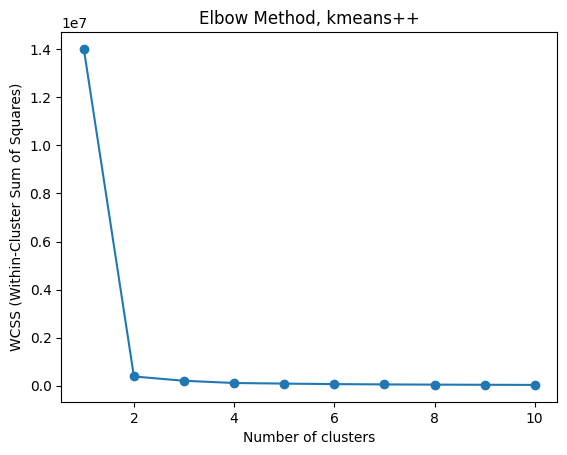

In [10]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method, kmeans++')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


Best k value = 4

In [11]:
wcss2 = []
for i in range(1, 11):
    kmeans_r = KMeans(n_clusters=i, init='random', n_init=10, random_state=0)
    kmeans_r.fit(embeds)
    wcss2.append(kmeans_r.inertia_)


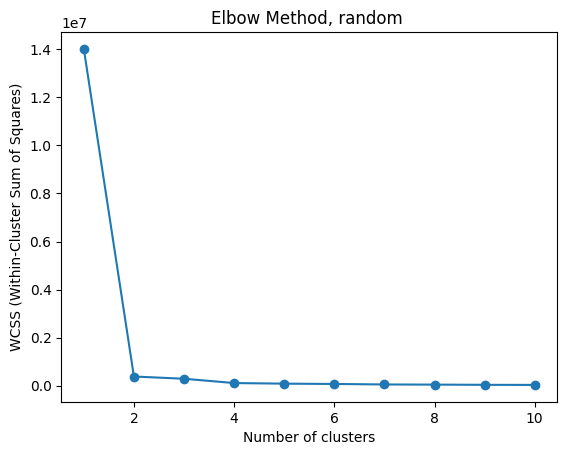

In [12]:
plt.plot(range(1, 11), wcss2, marker='o')
plt.title('Elbow Method, random ')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Here also best k value = 4.

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans.fit(embeds)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [20]:
!pip install scikit-learn

In [25]:
from sklearn import metrics


y_true = data['stars'].values.astype(int)

# Helper function to calculate purity
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = purity_score(y_true, kmeans.labels_)

# NMI
def calculate_nmi(clusters, true_labels):
    mutual_info = mutual_info_score(true_labels, clusters)
    total_samples = len(clusters)

    # Calculate entropy for clusters
    cluster_counts = np.bincount(clusters)
    cluster_probs = cluster_counts / total_samples
    entropy_cluster = -np.sum([p * np.log(p) if p > 0 else 0 for p in cluster_probs])

    # Calculate entropy for true labels
    label_counts = np.bincount(true_labels)
    label_probs = label_counts / total_samples
    entropy_labels = -np.sum([p * np.log(p) if p > 0 else 0 for p in label_probs])

    # Handle case where entropy is 0 (all samples in one cluster/label) to avoid division by zero
    if entropy_cluster == 0 or entropy_labels == 0:
        return 0

    return mutual_info / np.sqrt(entropy_cluster * entropy_labels)

nmi = calculate_nmi(kmeans.labels_, y_true)

# Rand Index
def calculate_rand_index(clusters, true_labels):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(true_labels), 2).sum()
    A = np.c_[(clusters, true_labels)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

rand_index = calculate_rand_index(kmeans.labels_, y_true)

# Print evaluation scores
print(f"Purity: {purity}")
print(f"NMI: {nmi}")
print(f"Rand Index: {rand_index}")

Purity: 0.7132140579873223
NMI: 0.5358546011063238
Rand Index: 0.7275735075323911


Purity: Purity measures the extent to which clusters contain instances from a single class. A purity score of 0.71 indicates that approximately 71.32% of instances in the dataset are correctly assigned to clusters where most members belong to the same class.

Normalized Mutual Information (NMI): NMI measures the mutual dependence between the clustering result and the true labels, normalized to fall between 0 and 1. A higher NMI value (0.54 in this case) indicates a stronger agreement between the clustering and the true labels.

Rand Index: The Rand Index quantifies the similarity between two data clusterings by considering all pairs of samples and counting pairs that are either in the same cluster or in different clusters in both the predicted and true labelings. A Rand Index of 0.73 suggests a relatively high agreement between the clustering and the true labels.

Conclusion:

* The K-means clustering algorithm achieved moderate to good performance based on the evaluation metrics.
The purity score indicates that most clusters predominantly contain instances from a single class, which is favorable for classification tasks.
* The NMI and Rand Index scores suggest that the clustering result agrees reasonably well with the true labels, indicating a meaningful grouping of data points.